## Projet Deep Learning : Reconnaissance d'images de pays

#### Dataset: 
Google Landmarks Dataset v2 :
https://github.com/cvdfoundation/google-landmark?tab=readme-ov-file


#### Objectif du projet :
<p style="text-align: justify;">
    L'objectif de ce projet est de développer une solution de Deep Learning pour la reconnaissance d'images. L'input sera une image d'un lieu, et la sortie du modèle sera le pays correspondant, accompagnée de probabilités d'appartenance.
</p>


In [14]:
# Packages
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
# Variables globales
DATA_TRAIN_PATH = "data/train"

### Importation des données

#### Labels et metadonnées

**train.csv** : id, url, id du lieu associés à un id d'image

In [55]:
train_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train.csv")
print(train_df.size)
train_df.head()

12398742


,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474


**train_attribution.csv** : id, url, auteur, titre associés à un id d'image

In [17]:
train_attribution_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train_attribution.csv")
train_attribution_df.head()
train_attribution_df.iloc[0,1]

'http://commons.wikimedia.org/wiki/File:Observatoriet_v%C3%A4derkammer_2013a.jpg'

**train_clean.csv** : id des images associées à un id de lieu

In [18]:
train_clean_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train_clean.csv")
train_clean_df.head()

,landmark_id,images
0,1,17660ef415d37059 92b6290d571448f6 cd41bf948edc...
1,7,25c9dfc7ea69838d 28b13f94a6f1f3c1 307d6584f473...
2,9,0193b65bb58d2c77 1a30a51a287ecf69 1f4e8ab1f1b2...
3,11,1a6cb1deed46bb17 1cc2c8fbc83e1a0c 2361b8da868c...
4,12,0a199c97c382b1ff 1492a5d344495391 290097bd36a6...


**train_label_to_category.csv** : page wikipedia associée à chaque id de lieu

In [19]:
train_label_to_category_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train_label_to_category.csv")
train_label_to_category_df['category']

0         http://commons.wikimedia.org/wiki/Category:Hap...
1         http://commons.wikimedia.org/wiki/Category:Lui...
2         http://commons.wikimedia.org/wiki/Category:Gra...
3         http://commons.wikimedia.org/wiki/Category:Twe...
4         http://commons.wikimedia.org/wiki/Category:San...
                                ...                        
203089    http://commons.wikimedia.org/wiki/Category:Isa...
203090    http://commons.wikimedia.org/wiki/Category:Mar...
203091    http://commons.wikimedia.org/wiki/Category:Sil...
203092    http://commons.wikimedia.org/wiki/Category:Hoa_Lu
203093    http://commons.wikimedia.org/wiki/Category:Sto...
Name: category, Length: 203094, dtype: object

**train_label_to_hierarchical.csv** : supercatégories et autres variables associées à chaque id de lieu

In [20]:
train_label_to_hierarchical_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train_label_to_hierarchical.csv")
train_label_to_hierarchical_df.head()

,landmark_id,category,supercategory,hierarchical_label,natural_or_human_made
0,0,http://commons.wikimedia.org/wiki/Category:Hap...,horse racing venue,sports venue,human-made
1,1,http://commons.wikimedia.org/wiki/Category:Lui...,park,parks,natural
2,2,http://commons.wikimedia.org/wiki/Category:Gra...,mountain,mountain,natural
3,5,http://commons.wikimedia.org/wiki/Category:Lak...,motorsport racing track,road,human-made
4,7,http://commons.wikimedia.org/wiki/Category:Spa...,multi-purpose hall,NaN,NaN


**category_to_location.csv** : villes,pays, coordonnées géo associés à chaque id de lieu

In [34]:
category_to_location_df = pd.read_csv(f"{DATA_TRAIN_PATH}/category_to_location.csv")
category_to_location_df.head()

,id,category_name,name,lat,lon,city,state,country
0,0,Category:Happy_Valley_Racecourse,Natural Turf Soccer Pitch No. 5,22.272800,114.182000,Hong Kong Island,Hong Kong,China
1,1,Category:Luitpoldpark_in_Munich,NaN,48.171494,11.569674,Munich,Bavaria,Germany
2,3,"Category:Tweed_Heads,_New_South_Wales",Ukerebagh Nature Reserve,-28.183300,153.550000,Tweed Heads,New South Wales,Australia
3,14,Category:Delacorte_Theater,Delacorte Theater,40.780100,-73.968767,New York,New York,United States
4,15,Category:Tremper_Mound_and_Earthworks,Tremper Mound,38.801300,-83.010600,NaN,Ohio,United States


#### Images

Importation d'images issues du foder images_000/.

**Exemple d'une image :**

In [35]:
exemple_image_id = '000adb02777b5bc9'

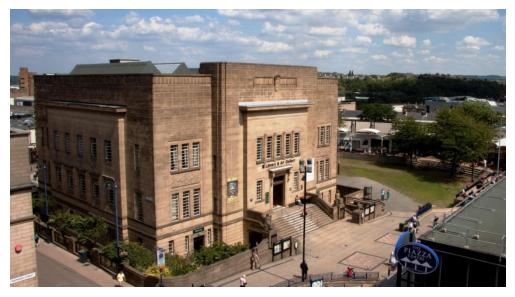

In [36]:
image_path = f'images_000/0/0/0/{exemple_image_id}.jpg'
image = Image.open(f"{DATA_TRAIN_PATH}/{image_path}")

# plot de l'image
plt.imshow(image)
plt.axis('off')
plt.show()


In [37]:
train_attribution_df[train_attribution_df['id'] == exemple_image_id]

,id,url,author,license,title
2098605,000adb02777b5bc9,http://commons.wikimedia.org/wiki/File:Hudders...,Libraries Taskforce,CC BY 2.0(https://creativecommons.org/licenses...,File:Huddersfield Library and Art Gallery (336...


Pour obtenir la supercategory de l'image, faire le croisement avec train_df :

In [40]:
exemple_landmark_id = train_df[train_df['id'] == exemple_image_id]['landmark_id'].iloc[0]
exemple_row = train_label_to_hierarchical_df[train_label_to_hierarchical_df['landmark_id'] == exemple_landmark_id]
exemple_category = exemple_row['category']
print('url du lieu : ',exemple_category.iloc[0])
exemple_row

url du lieu :  http://commons.wikimedia.org/wiki/Category:Huddersfield_Library_and_Art_Gallery


,landmark_id,category,supercategory,hierarchical_label,natural_or_human_made
94073,148064,http://commons.wikimedia.org/wiki/Category:Hud...,art museum,museum,human-made
